In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
from math import *
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [2]:
data = pd.read_csv('NpdbPublicUseDataCsv/NPDB1710.CSV',delimiter=',',low_memory=False)

In [130]:
state_pop = pd.read_excel('nst-est2016-01.xlsx',header=3,skip_footer=5)

new_index_list = {}
for s_label in state_pop.index:
    try:
        if s_label[0]=='.':
            new_index_list.update({s_label: s_label[1:]})
        else:
            new_index_list.update({s_label: s_label})
    except:
        new_index_list.update({s_label: 'unknown'})

#print(new_index_list)
state_pop.rename(new_index_list, axis='index',inplace=True)
state_pop

,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,State Abb
United States,308745538,308758105,309348193,311663358,313998379,316204908,318563456,320896618,323127513,US
Northeast,55317240,55318353,55388056,55632766,55829059,55988771,56116791,56184737,56209510,NE
Midwest,66927001,66929825,66978602,67153331,67332320,67543948,67726368,67838387,67941429,MW
South,114555744,114563005,114863114,116061801,117299171,118424320,119696311,121039206,122319574,SO
West,71945553,71946922,72118421,72815460,73537829,74247869,75023986,75834288,76657000,WE
Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300,AL
Alaska,710231,710249,714031,722713,731089,736879,736705,737709,741894,AK
Arizona,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071,AZ
Arkansas,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248,AR
California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017,CA


# Questions:

### 1) What is the per capita distribution of malpractice cases for states, counties? This can give us an idea about policy effects.

### 2) What fields, ages, genders are likely to get malpractice cases?

### 3) What demographic is more likely to sue?

### 4) What combinations of practitioner and patient are likely to result in malpractice cases?

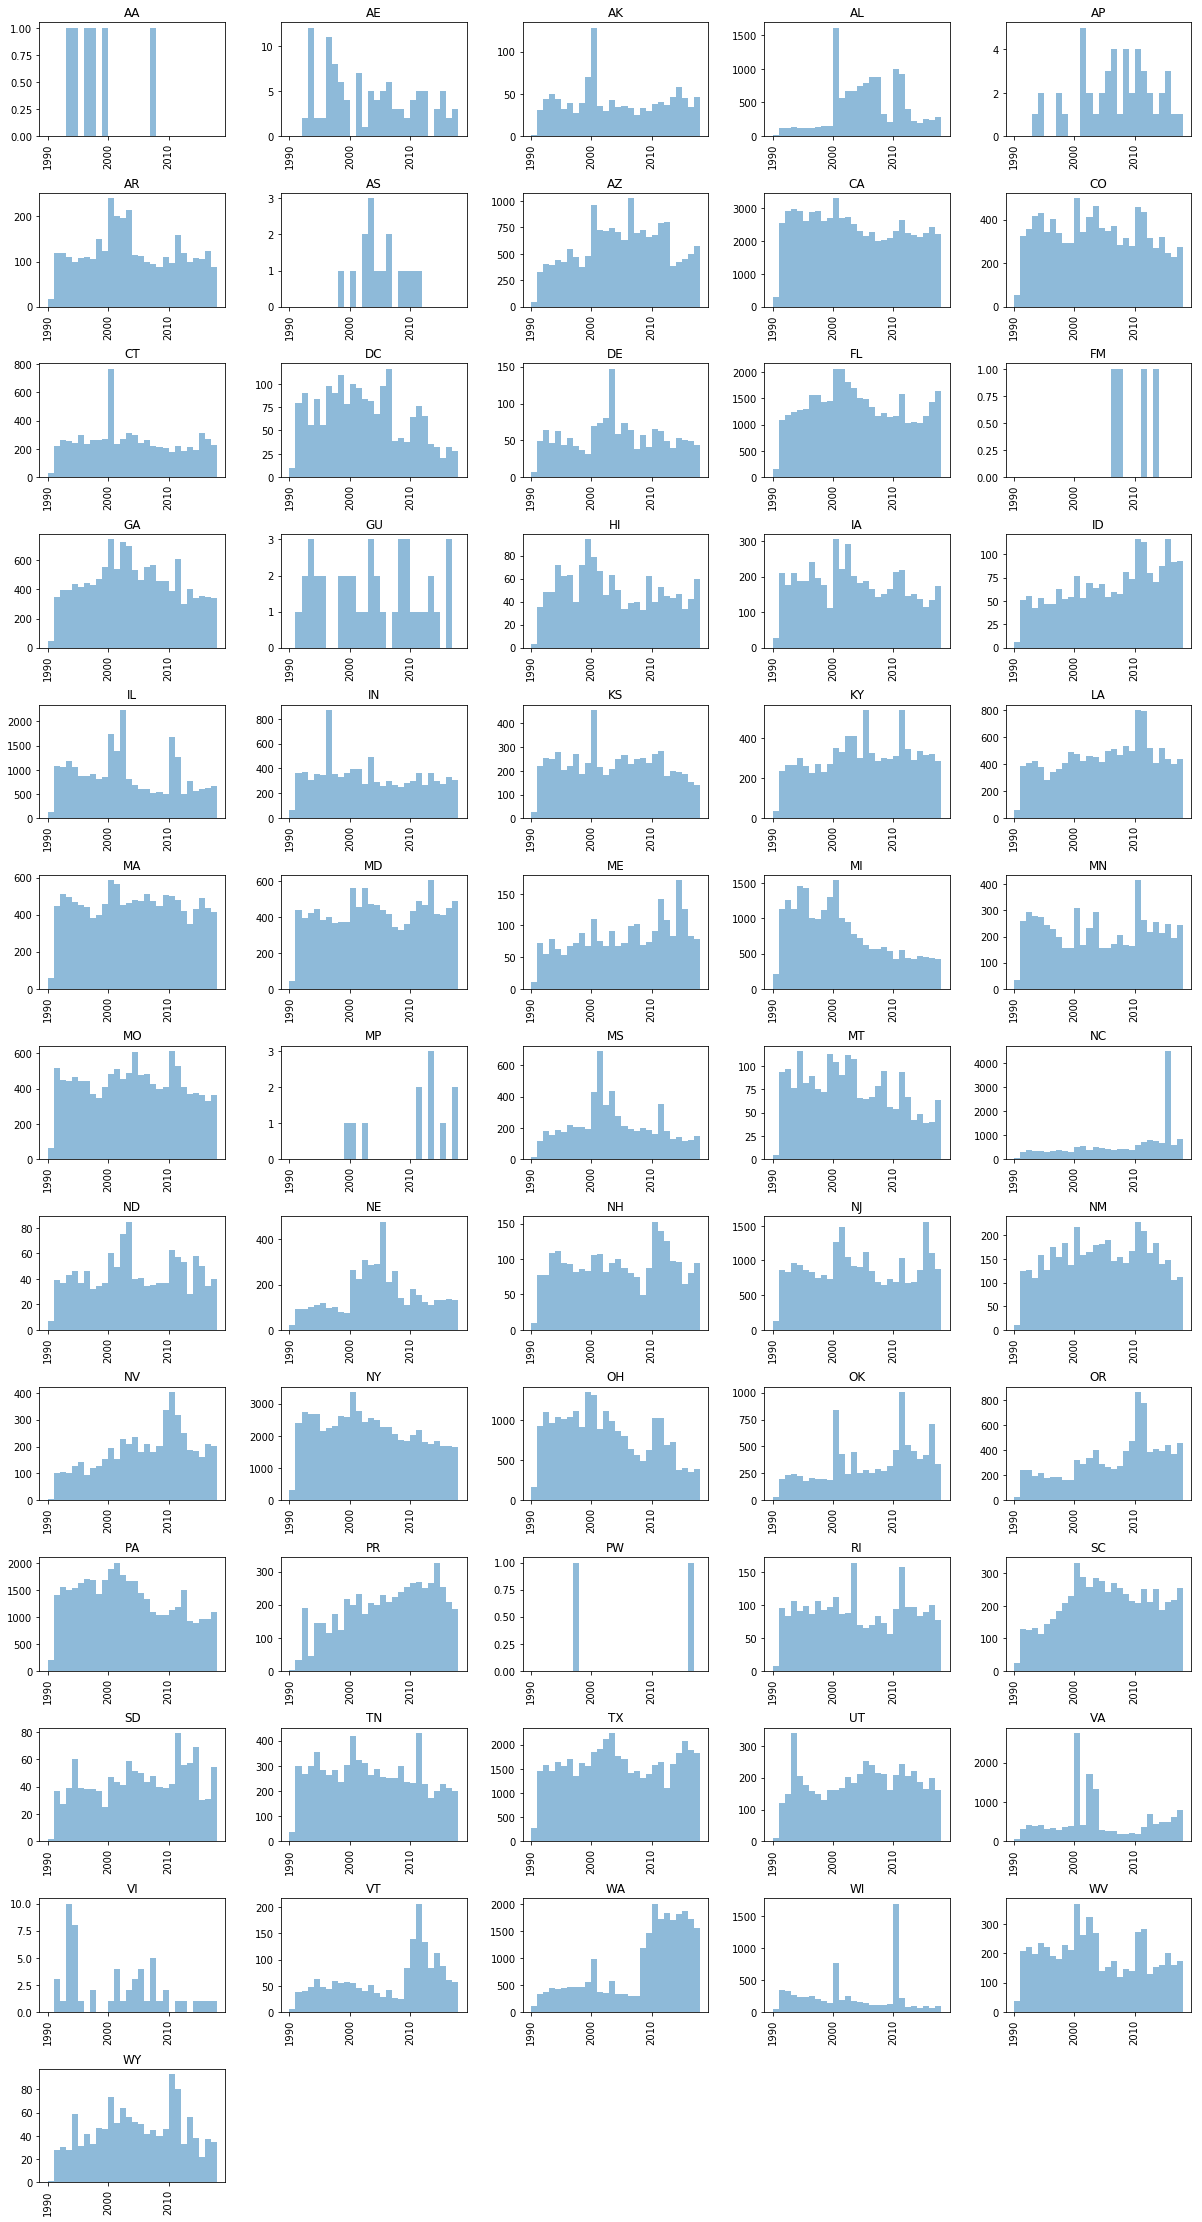

In [4]:
data.hist(column='ORIGYEAR',bins=2018-1990,range=(1990,2018),alpha=0.5,by='WORKSTAT',figsize=(20,40),layout=(13,5))
plt.show()

In [5]:
common_states = np.intersect1d(list(data["WORKSTAT"].unique()),list(state_pop["State Abb"]))

In [6]:
data["PAYMENT"].replace('[\$,]', '', regex=True, inplace=True)

In [7]:
pay_count = None
for state in common_states:
    #print(state)
    arrays = [[state,state], ['pay_per_case', 'count_per_10000']]
    column_names = pd.MultiIndex.from_arrays(arrays).T
    mean_payment = [pd.to_numeric(data[(data["WORKSTAT"]==state) & (data["ORIGYEAR"]==i)]['PAYMENT']).mean() for i in range(1990,2018)]
    count_per_capita = [10000*len(data[(data["WORKSTAT"]==state) & (data["ORIGYEAR"]==i)])/state_pop[state_pop["State Abb"]==state][2016][0] for i in range(1990,2018)]
    stack = pd.DataFrame(np.stack((mean_payment,
                                   count_per_capita),axis=0).T,
                         columns=column_names,
                         index=range(1990,2018))
    #print(stack)
    if type(pay_count)==None:
        pay_count = stack
    else:
        pay_count = pd.concat([pay_count, stack], axis=1)

pay_count

AK                             AL                  \
       pay_per_case count_per_10000   pay_per_case count_per_10000   
1990            NaN        0.013479  166966.666667        0.041124   
1991  196140.625000        0.417849  121558.333333        0.236465   
1992  105808.333333        0.593077  217455.555556        0.234409   
1993  130986.764706        0.673951  230903.448276        0.265252   
1994   85071.428571        0.593077  254741.666667        0.244690   
1995  178137.500000        0.431328  281157.894737        0.254971   
1996  151242.857143        0.525682  405196.236559        0.252915   
1997  158375.000000        0.363933  225808.988764        0.285814   
1998  286718.750000        0.525682  296460.674157        0.318714   
1999  270546.296296        0.943531  274947.887324        0.306376   
2000  159310.344828        1.725314  367873.529412        3.304341   
2001  240925.000000        0.485245  244472.727273        1.169987   
2002  210240.384615        0.404370  233686.781609        1.373553   
2003  241908.333333        0.579598  212584.027778        1.377665   
2004  189822.000000        0.471766  211181.818182        1.544219   
2005  737932.692308        0.485245  223898.305085        1.630580   
2006  187931.818182        0.444807  281934.375000        1.790965   
2007  482916.666667        0.336975  182864.912281        1.799190   
2008  193289.473684        0.444807  310454.545455        0.674439   
2009  229140.625000        0.404370  306960.000000        0.421524   
2010  615511.904762        0.512203  282437.500000        2.045936   
2011  419333.333333        0.539161  250020.833333        1.906113   
2012  361029.411765        0.498724  317812.500000        0.820431   
2013  289482.142857        0.620035  454377.659574        0.452368   
2014  270666.666667        0.781783  637780.172414        0.411243   
2015  334264.705882        0.606556  308533.653846        0.532560   
2016  208750.000000        0.471766  426599.000000        0.499661   
2017  251363.636364        0.620035  402366.071429        0.569572   

                 AR                             AZ                  \
       pay_per_case count_per_10000   pay_per_case count_per_10000   
1990   81357.142857        0.060236  166171.250000        0.062039   
1991   83832.258065        0.394880  122601.452282        0.471789   
1992  226307.065217        0.398227  181994.117647        0.581440   
1993  126375.000000        0.371455  111253.600000        0.571340   
1994  116544.871795        0.327951  155957.993197        0.643479   
1995  107418.354430        0.358069  183279.904306        0.610295   
1996  105860.000000        0.364762  134880.930931        0.793528   
1997   96891.791045        0.354723  230950.825083        0.672335   
1998  178015.789474        0.498620  164200.390625        0.542485   
1999  187451.219512        0.414959  182063.586957        0.692534   
2000  225487.654321        0.803146  231539.655172        1.386510   
2001  169092.233010        0.672635  257575.301205        1.047457   
2002  226741.818182        0.655903  254643.769968        1.028701   
2003  326037.974684        0.719485  274889.041096        1.074870   
2004  261940.229885        0.384841  291361.991870        1.021487   
2005  295718.085106        0.374802  273618.580060        0.913279   
2006  213264.492754        0.334644  253462.264151        1.478848   
2007  259293.103448        0.314566  313289.676113        1.009945   
2008  319433.035714        0.294487  327817.073171        1.048900   
2009  330504.098361        0.364762  295964.508929        0.956562   
2010  291380.434783        0.321258  263381.909548        0.973875   
2011  304291.666667        0.532084  311558.849558        1.145566   
2012  252745.833333        0.401573  300744.780220        1.154223   
2013  309718.181818        0.334644  307473.300971        0.561241   
2014  383099.137931        0.358069  301797.794118        0.608853   
2015  318035.000000       

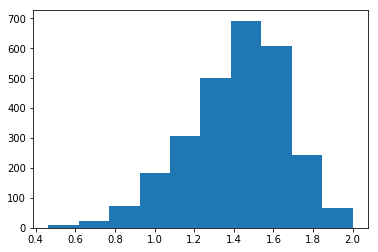

In [8]:
correlation_count = np.zeros((len(common_states),len(common_states)))

for state1 in range(len(common_states)):
    for state2 in range(len(common_states)):
        slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(pay_count[common_states[state1],"count_per_10000"],pay_count[common_states[state2],"count_per_10000"])
        correlation_count[state1,state2] = rvalue


plt.hist((correlation_count+1).flatten())
plt.show()

In [9]:
from sklearn.cluster import DBSCAN
# Compute DBSCAN

db = DBSCAN(eps=0.56, min_samples=1,metric='precomputed').fit_predict(1/(correlation_count+1))
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
db

for i in range(len(np.unique(db))):
    #print(np.where(db==i))
    print(common_states[np.where(db==i)])

['AK' 'CT' 'VA']
['AL' 'AZ' 'SC']
['AR' 'CA' 'CO' 'FL' 'GA' 'IA' 'IL' 'KS' 'MA' 'MI' 'MO' 'MS' 'MT' 'NY' 'OH'
 'PA' 'TN' 'WV']
['DC']
['DE' 'ND']
['HI']
['ID' 'LA' 'NV' 'OR' 'WA']
['IN']
['KY']
['MD']
['ME']
['MN']
['NC']
['NE']
['NH']
['NJ']
['NM' 'WY']
['OK']
['PR']
['RI']
['SD']
['TX']
['UT']
['VT']
['WI']


In [126]:
delta_count = []
std_delta_count = []
for state in common_states:
    slope = np.array(pay_count[state]['count_per_10000'][2:])-np.array(pay_count[state]['count_per_10000'][1:-1])
    delta_count.append(np.mean(np.array(slope)))
    std_delta_count.append(np.std(np.array(slope)))
    #print(state, np.mean(np.array(slope)), np.std(np.array(slope)))

CLUSTER 0


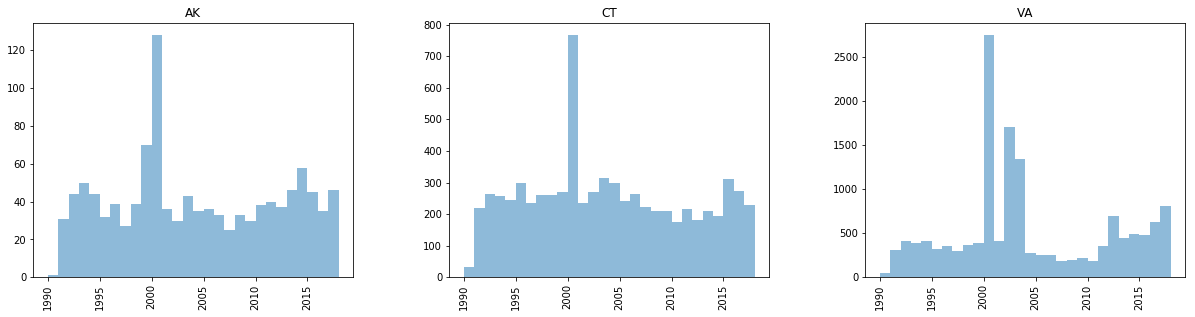

CLUSTER 1


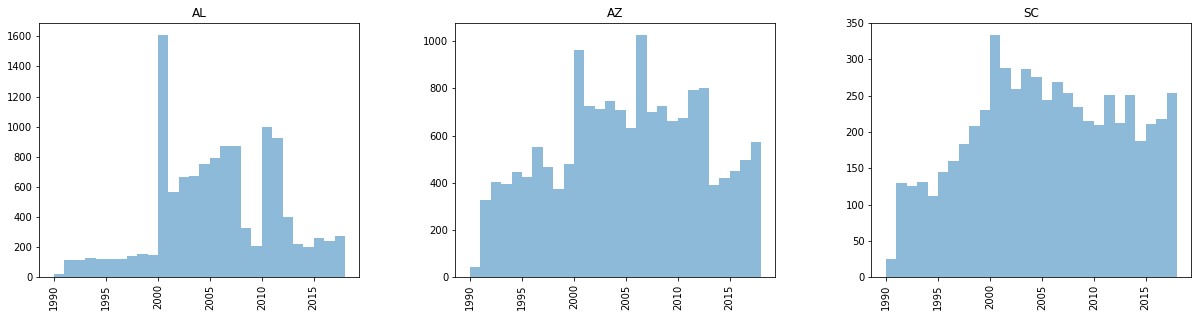

CLUSTER 2


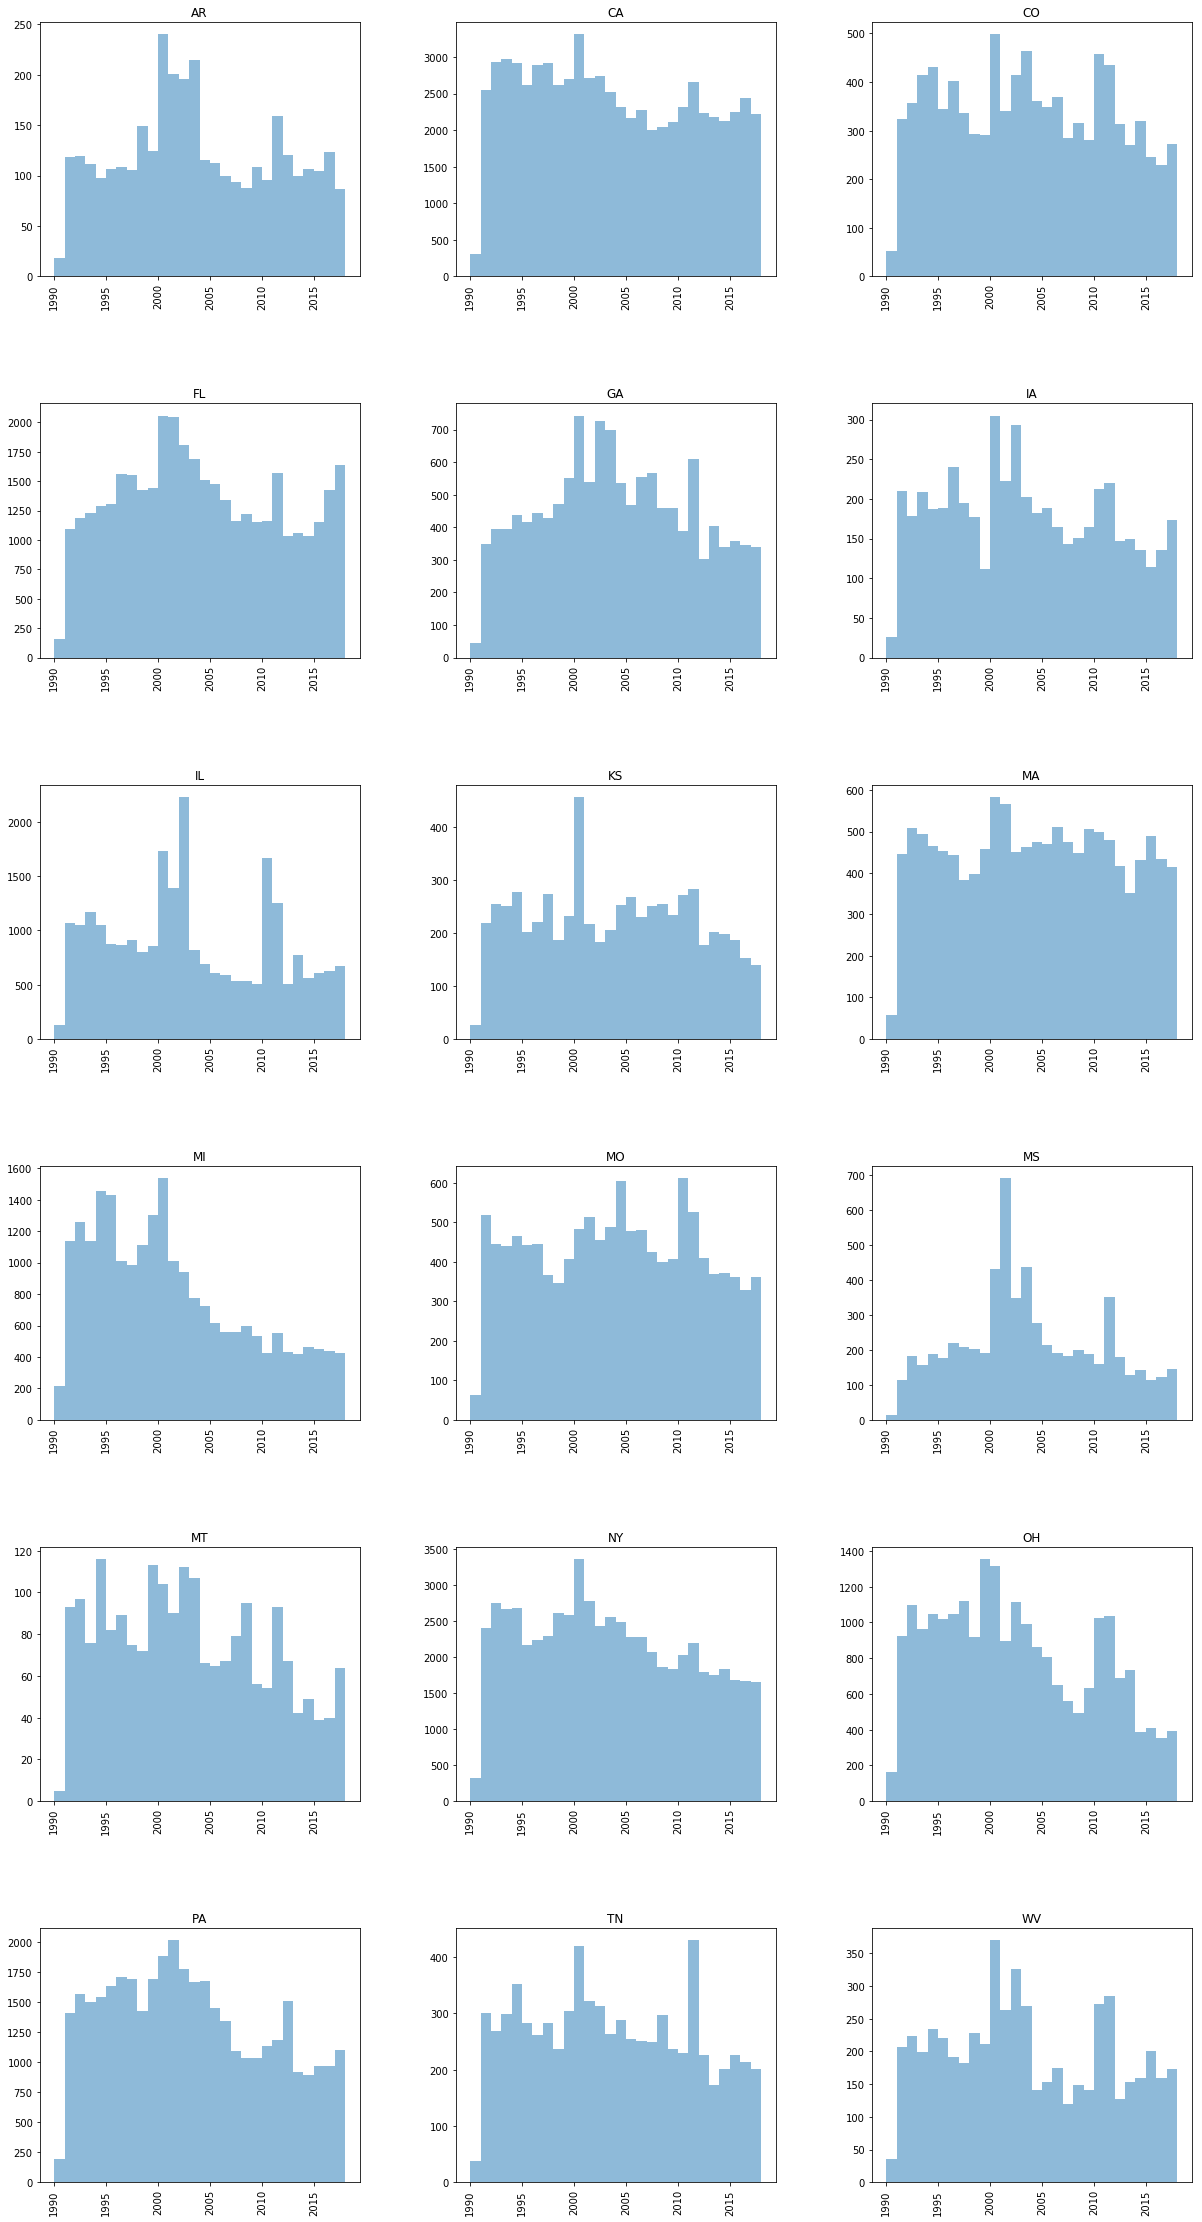

CLUSTER 3


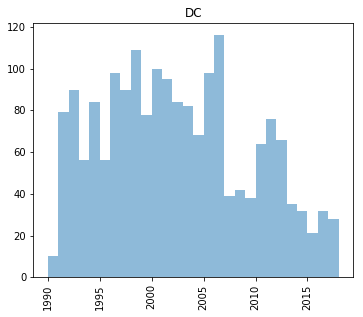

CLUSTER 4


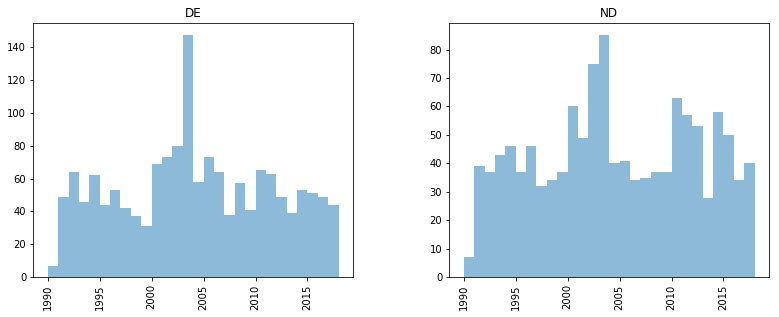

CLUSTER 5


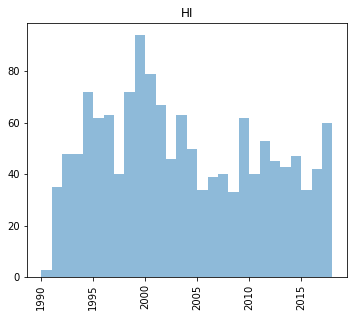

CLUSTER 6


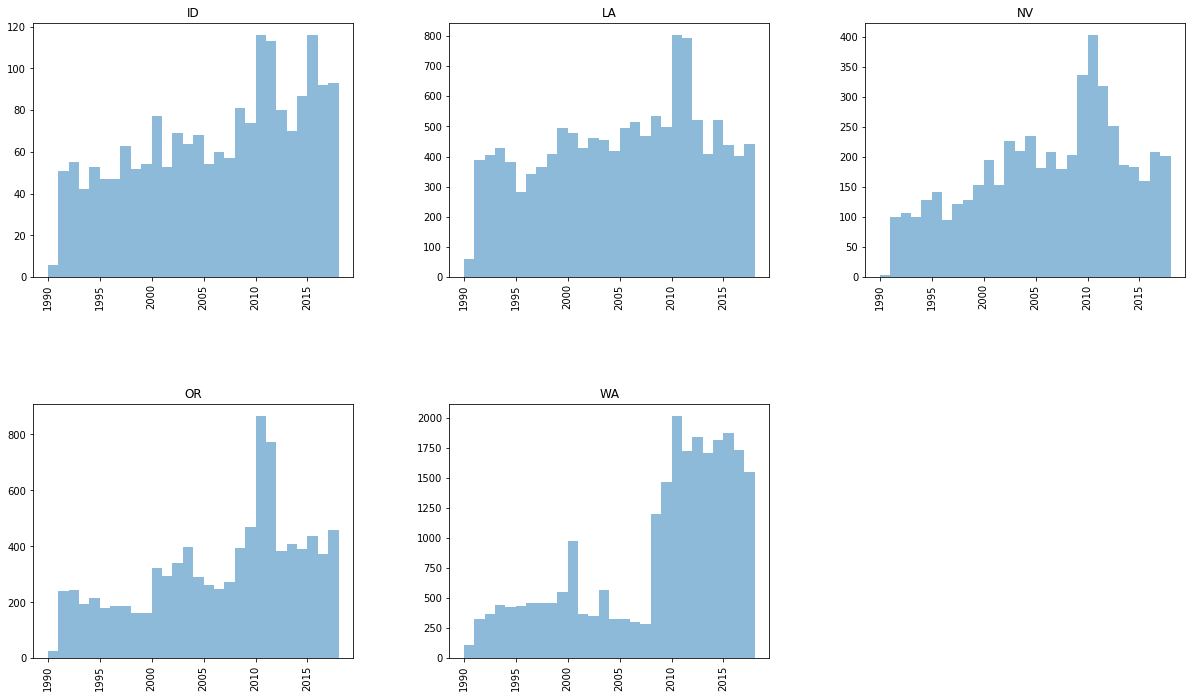

CLUSTER 7


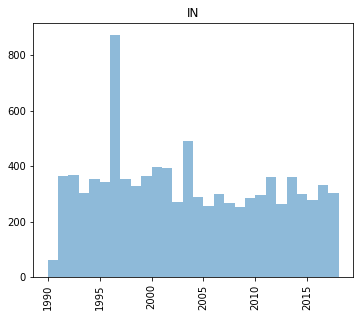

CLUSTER 8


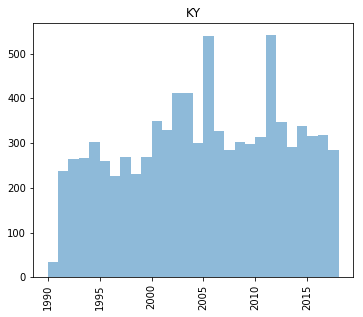

CLUSTER 9


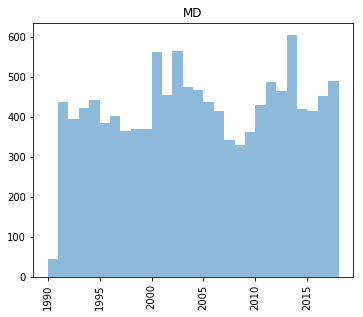

CLUSTER 10


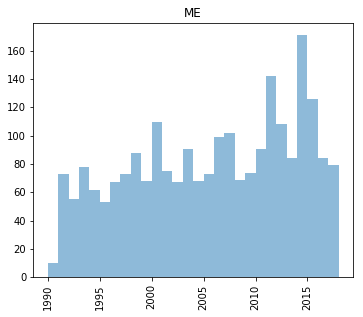

CLUSTER 11


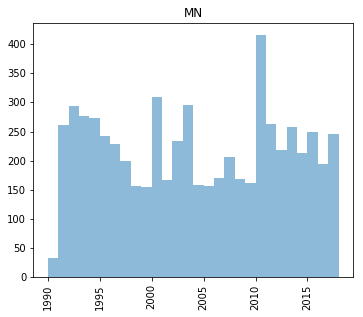

CLUSTER 12


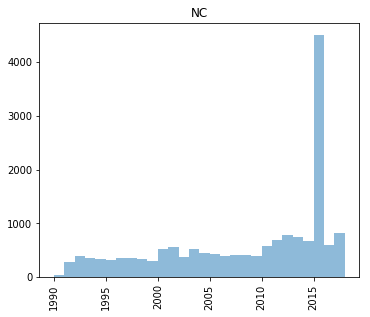

CLUSTER 13


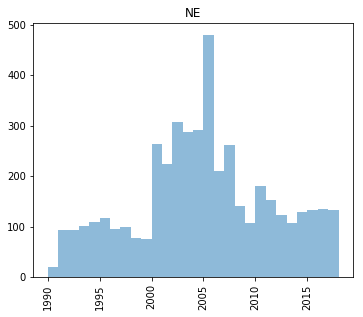

CLUSTER 14


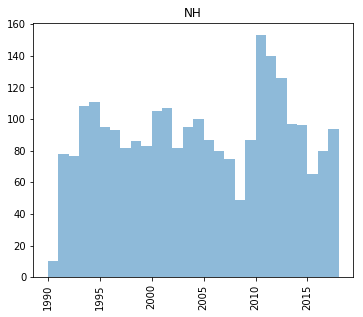

CLUSTER 15


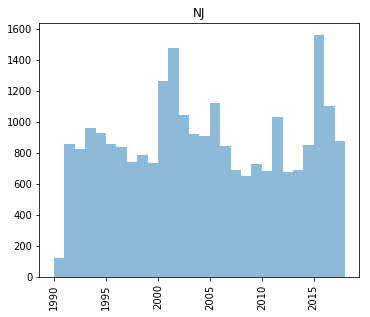

CLUSTER 16


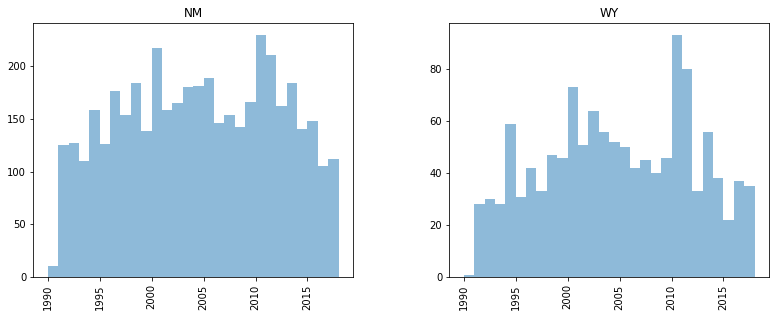

CLUSTER 17


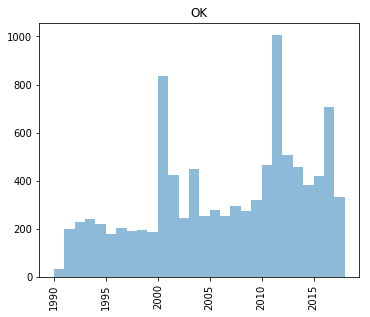

CLUSTER 18


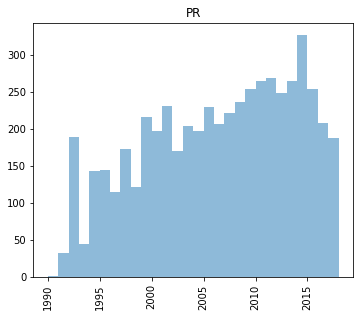

CLUSTER 19


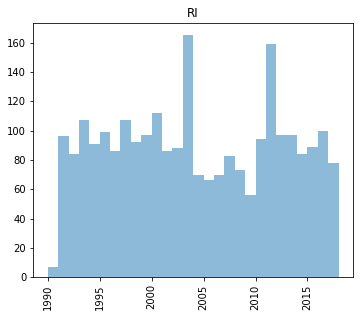

CLUSTER 20


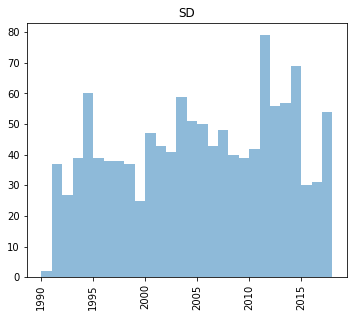

CLUSTER 21


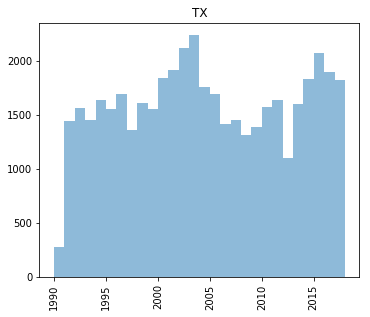

CLUSTER 22


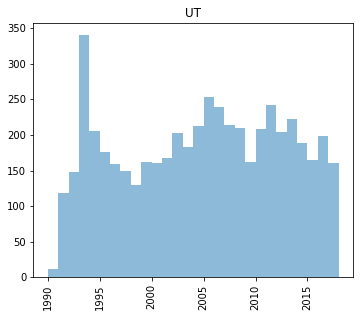

CLUSTER 23


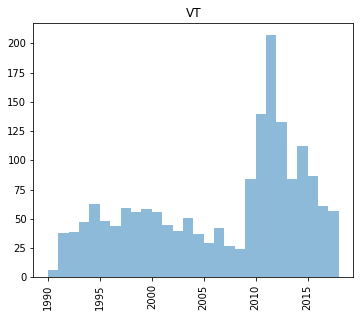

CLUSTER 24


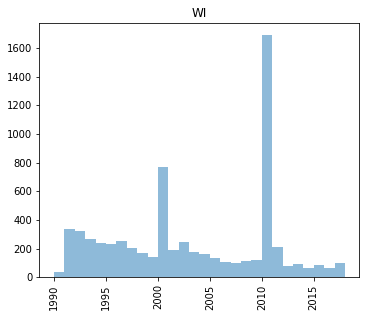

In [129]:
for i in range(len(np.unique(db))):
    print("CLUSTER "+str(i))
    data[data["WORKSTAT"].isin(list(common_states[np.where(db==i)]))].hist(column='ORIGYEAR',bins=2018-1990,range=(1990,2018),alpha=0.5,by='WORKSTAT',figsize=(20,40),layout=(6,3))
    plt.show()
    slope = []
    for state in list(common_states[np.where(db==i)]):
    #    plt.plot(pay_count.index,pay_count[state]['count_per_10000'])
        #print(np.array(pay_count[state]['count_per_10000'].iloc[1:]))
        #print(pay_count[state]['count_per_10000'][:-1])
        slope.append(np.array(pay_count[state]['count_per_10000'][2:])-np.array(pay_count[state]['count_per_10000'][1:-1]))
    #plt.show()
    #print(slope)
    #print(np.mean(np.array(slope).flatten()),np.std(np.array(slope).flatten()))
    

In [12]:
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper,
    LabelSet,
    Label
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

In [13]:
from bokeh.sampledata.us_states import data as states

del states["HI"]
del states["AK"]

palette.reverse()

{'NV': {'name': 'Nevada', 'region': 'Southwest', 'lats': [40.68928, 40.4958, 40.30302, 40.09896, 39.99994, 39.75817, 39.61018, 39.45715, 39.36296, 39.23851, 39.08777, 38.90545, 38.75165, 38.55049, 38.20495, 37.95499, 37.77873, 37.70735, 37.47222, 37.13439, 37.0004, 36.99997, 36.817, 36.60322, 36.37619, 36.21464, 36.09833, 36.01461, 36.10119, 36.15058, 36.11546, 36.05493, 35.98542, 35.9167, 35.86436, 35.81412, 35.73579, 35.66942, 35.60517, 35.5417, 35.49125, 35.37012, 35.21811, 35.14231, 35.11791, 35.07971, 35.00332, 35.00186, 35.00195, 35.15341, 35.38796, 35.59033, 35.81231, 36.0018, 36.14577, 36.37205, 36.75057, 37.08441, 37.43715, 37.6185, 37.75309, 37.96065, 38.30368, 38.60904, 38.83427, 38.98156, 39.37557, 39.57782, 39.79567, 40.08934, 40.39719, 40.86934, 41.26742, 41.97905, 41.99454, 41.99484, 41.9972, 41.99746, 41.99621, 41.99594, 41.99572, 41.99428, 41.99384, 41.99375, 41.99259, 41.99478, 41.99586, 41.99629, 41.99699, 41.9975, 41.99767, 41.99804, 41.99817, 41.99842, 41.99819, 41

In [14]:
states = {
    code: state for code, state in states.items()
}
print(states)

{'NV': {'name': 'Nevada', 'region': 'Southwest', 'lats': [40.68928, 40.4958, 40.30302, 40.09896, 39.99994, 39.75817, 39.61018, 39.45715, 39.36296, 39.23851, 39.08777, 38.90545, 38.75165, 38.55049, 38.20495, 37.95499, 37.77873, 37.70735, 37.47222, 37.13439, 37.0004, 36.99997, 36.817, 36.60322, 36.37619, 36.21464, 36.09833, 36.01461, 36.10119, 36.15058, 36.11546, 36.05493, 35.98542, 35.9167, 35.86436, 35.81412, 35.73579, 35.66942, 35.60517, 35.5417, 35.49125, 35.37012, 35.21811, 35.14231, 35.11791, 35.07971, 35.00332, 35.00186, 35.00195, 35.15341, 35.38796, 35.59033, 35.81231, 36.0018, 36.14577, 36.37205, 36.75057, 37.08441, 37.43715, 37.6185, 37.75309, 37.96065, 38.30368, 38.60904, 38.83427, 38.98156, 39.37557, 39.57782, 39.79567, 40.08934, 40.39719, 40.86934, 41.26742, 41.97905, 41.99454, 41.99484, 41.9972, 41.99746, 41.99621, 41.99594, 41.99572, 41.99428, 41.99384, 41.99375, 41.99259, 41.99478, 41.99586, 41.99629, 41.99699, 41.9975, 41.99767, 41.99804, 41.99817, 41.99842, 41.99819, 41

In [15]:
state_xs = [states[code]["lons"] for code in states]
state_ys = [states[code]["lats"] for code in states]

[[-114.04392, -114.04558, -114.04619, -114.04644, -114.04658, -114.04727, -114.04757, -114.0473, -114.04779, -114.04841, -114.04885, -114.04833, -114.04916, -114.04992, -114.04997, -114.05013, -114.04939, -114.05198, -114.05264, -114.05187, -114.0506, -114.0506, -114.05014, -114.04736, -114.04338, -114.04404, -114.1139, -114.22646, -114.32346, -114.51122, -114.6729, -114.73513, -114.74365, -114.70883, -114.67489, -114.70415, -114.69704, -114.68702, -114.65449, -114.66076, -114.6768, -114.61121, -114.58031, -114.57354, -114.63064, -114.60899, -114.63423, -114.63349, -114.63361, -114.82052, -115.11622, -115.36992, -115.65233, -115.89512, -116.08072, -116.37528, -116.87227, -117.31883, -117.79563, -118.04392, -118.22972, -118.51722, -119.00097, -119.43506, -119.76041, -119.9748, -120.00608, -120.0015, -120.00049, -119.99733, -119.99567, -119.99926, -120.00002, -119.99919, -119.99917, -119.99917, -119.90622, -119.80128, -119.70479, -119.61469, -119.48157, -119.36302, -119.25103, -119.0022,

In [16]:
state_names = [state['name'] for state in states.values()]

In [124]:
state_rates = []
for name in state_names:
    abbr = state_pop.loc[name]["State Abb"]
    state_rates.append(delta_count[np.where(common_states==abbr)[0][0]])

In [123]:
lat_inkm = 111.132 ## at around lat = 45degrees from the wiki latitude page
lon_inkm = 78.847

In [122]:
text_position_x = []
for statex in state_xs:
    text_position_x.append(float("%.5f" % round(max(statex)-(max(statex)-min(statex))/2,5)))
    
text_position_y = []
for statey in state_ys:
    text_position_y.append(float("%.5f" % round(max(statey)-(max(statey)-min(statey))/2,5)))

In [119]:
from bokeh.palettes import Spectral11,Category10

db_order = []
for name in state_names:
    abbr = state_pop.loc[name]["State Abb"]
    db_order.append(db[np.where(common_states==abbr)[0][0]])

In [120]:
db_spectral = []
for i in db_order:
    #print(i,len(np.where(db_order==i)[0]),i%11)
    if len(np.where(db_order==i)[0])==1:
        db_spectral.append(-1)
    if len(np.where(db_order==i)[0])>1:
        db_spectral.append(i)
        
print(db_spectral)
db_spectral_arr = np.array(db_spectral)
print(np.unique(db_spectral_arr[np.where(db_spectral_arr!=-1)[0]]))
ordered = 0
for label in np.unique(db_spectral_arr[np.where(db_spectral_arr!=-1)[0]]):
    db_spectral_arr[np.where(db_spectral_arr==label)[0]]=ordered
    ordered += 1

[6, 1, -1, 2, 2, 0, -1, -1, 2, 2, -1, 2, 1, 0, -1, -1, 2, 2, -1, -1, 2, 2, -1, -1, 6, 4, -1, -1, -1, 4, -1, 2, 2, 2, 6, 16, 16, 2, 1, -1, 2, 6, 2, 6, 2, -1, 2, 2, -1]
[ 0  1  2  4  6 16]


In [121]:
state_clusters = []
for i in range(len(db_spectral_arr)):
    if db_spectral_arr[i]==-1:
        state_clusters.append('black')
    else:
        state_clusters.append(Category10[10][db_spectral_arr[i]])

In [111]:
from bokeh.models import LogColorMapper, LogTicker, ColorBar

In [118]:
color_mapper = LogColorMapper(palette=palette, low=min(state_rates), high=max(state_rates))


source = ColumnDataSource(data=dict(
    x=state_xs,
    y=state_ys,
    name=state_names,
    rate=state_rates,
    clusters=state_clusters,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(title="Change in the number of malpractice cases filed per 10,000 citizens per states, 1990-2018", 
    plot_width=int((max(max(state_xs))-min(min(state_xs)))*lon_inkm/3), 
    plot_height=int((max(max(state_ys))-min(min(state_ys)))*lat_inkm/3), tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))

p.add_layout(color_bar, 'right')

source2 = ColumnDataSource(data=dict(
    x=text_position_x,
    y=text_position_y,
    name=state_names,
    rate=state_rates,
    clusters=state_clusters,
))

#labels = LabelSet(x='x', y='y', text='name', level='glyph',
#              x_offset=-15, y_offset=-1, source=source2,
#                  text_color='clusters',render_mode='canvas')

#p.add_layout(labels)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips ="""
    <font size="3">State: <strong>@name</strong> </font> <br>
    <font size="3">Change in the number of malpractice cases </font> <br>
    <font size="3">per year from 1990 to 2018: <strong>@rate per 10,000</strong> </font>
"""

show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: state_clusters [renderer: GlyphRenderer(id='5ce49a49-e788-48ca-9e6b-e984fe592a63', ...)]
